Лабораторная работа 5.1 Журавлев К. В. ПИ20-1

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats

**Задание 1**

Загрузите и прочитайте в pandas приложенный датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится (рис.1), необходимо его обработать.

In [ ]:
dates_list = ["dateCreated", "lastSeen", "dateCrawled"]

In [ ]:
df = pd.read_csv("./cars_sampled.csv", parse_dates=dates_list)
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2016-03-04 15:48:00,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,2016-03-04,29690,2016-05-04 15:16:00
49997,2016-03-27 14:55:00,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,2016-03-27,50181,2016-07-04 11:45:00
49998,2016-03-14 18:51:00,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,2016-03-14,86956,2016-03-25 06:17:00
49999,2016-03-15 18:06:00,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,2016-03-15,65232,2016-06-04 17:15:00


**Задание 2**

Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

Размерность

In [ ]:
df.shape

(50001, 19)

In [ ]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

Типы данных

In [ ]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50001 non-null  datetime64[ns]
 1   name                 50001 non-null  object        
 2   seller               50001 non-null  object        
 3   offerType            50001 non-null  object        
 4   price                50001 non-null  int64         
 5   abtest               50001 non-null  object        
 6   vehicleType          44813 non-null  object        
 7   yearOfRegistration   50001 non-null  int64         
 8   gearbox              47177 non-null  object        
 9   powerPS              50001 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            50001 non-null  int64         
 12  monthOfRegistration  50001 non-null  int64         
 13  fuelType             45498 non-

Описательная статистика

In [ ]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


Пустые значения

In [ ]:
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

**Задание 3**

Поработайте с типами переменных. Все числовые значения переведите в формат int.

**Задание 4**

Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

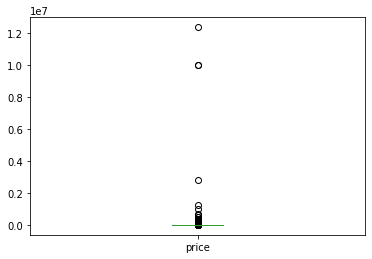

In [ ]:
df["price"].plot.box()
plt.show()

In [ ]:
for x in ["price"]:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

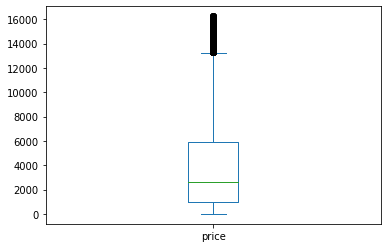

In [ ]:
df["price"].plot.box()
plt.show()

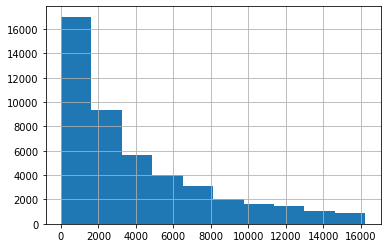

In [ ]:
df["price"].hist()
plt.show()

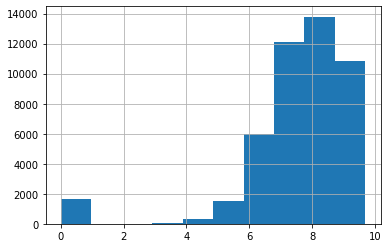

In [ ]:
df['price'] = np.log(df['price']+1)
df['price'].hist()
plt.show()

In [ ]:
df["price"].isna().sum()

3757

**Задание 5**

Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

In [ ]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
price,1.000000,0.005603,0.096838,-0.108628,0.170537,0.068389
yearOfRegistration,0.005603,1.000000,-0.004394,-0.064188,-0.023152,-0.001615
powerPS,0.096838,-0.004394,1.000000,-0.016447,0.034345,0.017415
kilometer,-0.108628,-0.064188,-0.016447,1.000000,0.001985,-0.024076
monthOfRegistration,0.170537,-0.023152,0.034345,0.001985,1.000000,0.019050
postalCode,0.068389,-0.001615,0.017415,-0.024076,0.019050,1.000000


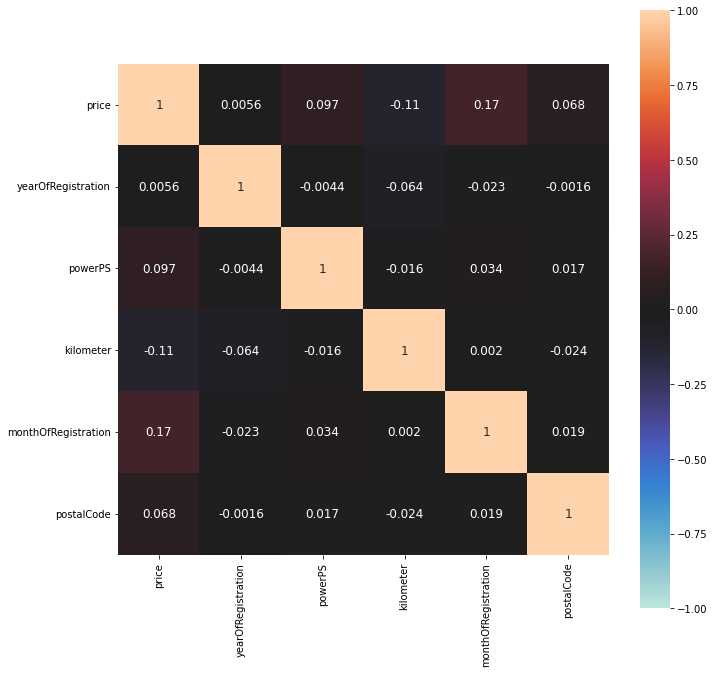

In [ ]:
ax = sns.heatmap(
    df.corr(),
    annot=True,
    annot_kws={'size': 12},
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(11, 11)

Факторы слабо коррелируют с целевой функцией price

**Задание 6**

Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

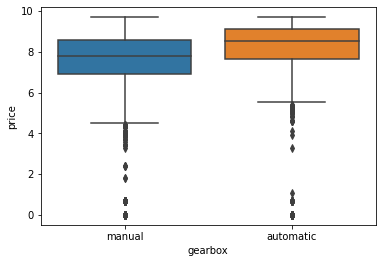

In [ ]:
sns.boxplot(x=df["gearbox"], y=df["price"])
plt.show()

Авто с автоматической коробкой передач дороже

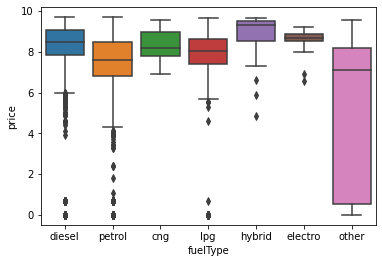

In [ ]:
sns.boxplot(x=df["fuelType"], y=df["price"])
plt.show()

Гибриды дороже всех остальных, бензин - самый популярный

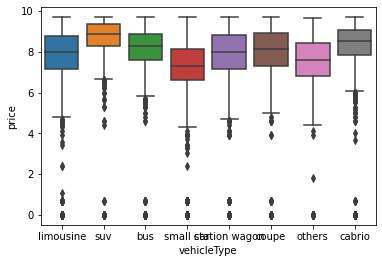

In [ ]:
sns.boxplot(x=df["vehicleType"], y=df["price"])
plt.show()

Внедорожники дороже всех

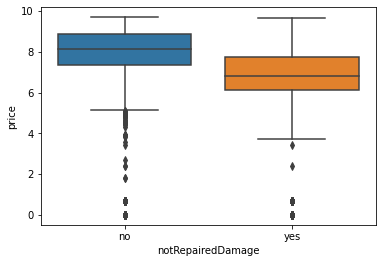

In [ ]:
sns.boxplot(x=df["notRepairedDamage"], y=df["price"])
plt.show()

**Задание 7**

Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [ ]:
df.shape

(50001, 19)

In [ ]:
for i in range(50000):
  if df['price'][i] == 0:
    print(df['price'][i])

KeyError: ignored

In [ ]:
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                  3757
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [ ]:
df = df.dropna(subset=["notRepairedDamage"])

In [ ]:
df["gearbox"] = df["gearbox"].fillna(stats.mode(df["gearbox"]))

<ipython-input-70-b494c6d95011>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gearbox"] = df["gearbox"].fillna(stats.mode(df["gearbox"]))


In [ ]:
df['gearbox'].replace(['manual', 'automatic'],
                        [0, 1], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df["vehicleType"] = df["vehicleType"].fillna(stats.mode(df["vehicleType"]))

<ipython-input-72-5940b28136dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vehicleType"] = df["vehicleType"].fillna(stats.mode(df["vehicleType"]))


In [ ]:
df["fuelType"] = df["fuelType"].fillna(stats.mode(df["fuelType"]))

<ipython-input-73-29179aea4793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fuelType"] = df["fuelType"].fillna(stats.mode(df["fuelType"]))


In [ ]:
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                  3548
abtest                    0
vehicleType               0
yearOfRegistration        0
gearbox                   0
powerPS                   0
model                  1519
kilometer                 0
monthOfRegistration       0
fuelType                  0
brand                     0
notRepairedDamage         0
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [ ]:
stats.mode(df["model"])

'golf'

In [ ]:
df["model"] = df["model"].fillna('golf')

<ipython-input-76-6390ffb7e4b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["model"] = df["model"].fillna('golf')


In [ ]:
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                  3548
abtest                    0
vehicleType               0
yearOfRegistration        0
gearbox                   0
powerPS                   0
model                     0
kilometer                 0
monthOfRegistration       0
fuelType                  0
brand                     0
notRepairedDamage         0
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [ ]:
df['price'] = df['price'].fillna(df['price'].mean())

<ipython-input-78-6a1c23d09cd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].fillna(df['price'].mean())


In [ ]:
df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

In [ ]:
fuel_type = pd.get_dummies(df['fuelType'], prefix='fuelType', drop_first=True)
df = pd.concat([fuel_type, df], axis=1)
df = df.drop('fuelType', axis=1)
notRepairedDamage = pd.get_dummies(df['notRepairedDamage'], prefix='notRepairedDmg', drop_first=True)
df = pd.concat([notRepairedDamage, df], axis=1)
df = df.drop('notRepairedDamage', axis=1)

**Задание 8**

Сохраните датасет и выведите его

In [ ]:
df.head(100)

,notRepairedDmg_yes,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,dateCrawled,name,seller,...,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,dateCreated,postalCode,lastSeen
1,0,1,0,0,0,0,0,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,...,2005,0,163,xc_reihe,150000,6,volvo,2016-07-03,88045,2016-03-26 13:17:00
3,0,0,0,0,0,0,1,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,...,2006,0,86,ibiza,60000,12,seat,2016-03-19,34537,2016-07-04 04:44:00
4,0,1,0,0,0,0,0,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,...,2008,1,185,xc_reihe,150000,11,volvo,2016-03-16,55270,2016-01-04 23:18:00
5,0,0,0,0,0,0,1,2016-02-04 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,...,1995,0,90,passat,150000,2,volkswagen,2016-02-04,26826,2016-02-04 12:51:00
7,0,0,0,0,0,0,1,2016-03-24 15:52:00,Mercedes_Benz_CLK_Coupe_200,private,...,1997,0,136,clk,150000,11,mercedes_benz,2016-03-24,13353,2016-03-27 12:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0,1,0,0,0,0,0,2016-03-26 16:57:00,Sharan_Comfortline_4M_BlueMotion_Technology_2_...,private,...,2013,0,103,sharan,40000,9,volkswagen,2016-03-26,12163,2016-06-04 05:44:00
118,0,0,0,0,0,0,1,2016-03-29 13:49:00,Mercedes_Benz_C_300_7G_TRONIC_Avantgarde,private,...,2010,1,231,c_klasse,70000,1,mercedes_benz,2016-03-29,95189,2016-05-04 23:17:00
119,0,0,0,0,0,0,1,2016-02-04 17:39:00,Opel_Agila_1.0_12_V,private,...,2003,0,58,agila,150000,9,opel,2016-02-04,64807,2016-02-04 17:39:00
120,0,0,0,0,0,0,1,2016-03-18 20:44:00,Volkswagen_Touran_1.6_FSI,private,...,2003,0,116,touran,150000,9,volkswagen,2016-03-18,72584,2016-05-04 22:47:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40285 entries, 1 to 50000
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   notRepairedDmg_yes   40285 non-null  uint8         
 1   fuelType_diesel      40285 non-null  uint8         
 2   fuelType_electro     40285 non-null  uint8         
 3   fuelType_hybrid      40285 non-null  uint8         
 4   fuelType_lpg         40285 non-null  uint8         
 5   fuelType_other       40285 non-null  uint8         
 6   fuelType_petrol      40285 non-null  uint8         
 7   dateCrawled          40285 non-null  datetime64[ns]
 8   name                 40285 non-null  object        
 9   seller               40285 non-null  object        
 10  offerType            40285 non-null  object        
 11  price                40285 non-null  float64       
 12  abtest               40285 non-null  object        
 13  vehicleType          40285 non-

In [ ]:
df.to_csv("./out.csv")